In [2]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

In [3]:
xu = fb[fb.page_name == "高雄小金剛許智傑"]

# 依照按讚數 低到高排序
xu = xu.sort_values(by=['like_count'])
# 用新的排序當作順序
xu.reset_index(inplace=True)

# 把時間格式轉換
xu['new_date'] = pd.to_datetime(xu['created_time_taipei']).dt.date
xu['post_hour'] = pd.to_datetime(xu['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
xu['month_year'] = pd.to_datetime(xu['new_date']).dt.to_period('M')

xu.head(1)

,index,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
0,22314,279997645348476_2783241708357378,279997645348476,高雄小金剛許智傑,公眾人物,NaN,高雄小金剛許智傑更新了近況。,status,https://www.facebook.com/279997645348476/posts/2783241708357378/,2019-07-09T01:54:48+0000,...,0,0,0,0,0,0,0,2019-07-09,9,2019-07


In [4]:
doc_names = range(len(xu)) #有幾篇文章 : 528 篇文章
doc_names

range(0, 687)

結巴斷詞 jieba

len(liu): 看劉櫂豪的貼文總共有幾筆
list(liu['message']): 把要斷詞的內容轉成 list 格式
創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [6]:
import numpy as np
xu = xu.replace(np.nan, '', regex=True) #將nan取代成空白字串

text_list = list(xu['message'])
# 把所有message轉成一個list 用for iterate

In [10]:
words = jieba.lcut(text_list[2], cut_all = False)
print(words)

['～', '從', '風城變', '水城', '，', '論', '去年', '高雄市', '823', '泡水', '之戰', '～', '\n', '\n', '去年', '南台', '灣', '823', '大', '淹水', '，', '許多人', '說', '陳', '菊', '市長', '治水', '無效', '，', '滯洪池', '無效', '，', '導致', '路面', '出現', '5000', '個', '坑洞', '，', '其實', '是', '錯誤', '的', '講法', '，', '我們', '用', '科學來', '論述', '會', '比', '較', '客觀', '。', '\n', '\n', '第一', '、', '高雄市', '防洪', '排水量', '的', '設計', '和', '東京', '差不多', '，', '每小時', '若', '超過', '70', '毫米', '的', '降雨量', '，', '高雄', '和', '東', '京都', '會', '淹水', '。', '台北市', '較', '高', '一些', '，', '但', '每小時', '若', '超過', '80', '毫米', '的', '降雨量', '，', '台北市', '也', '會', '淹水', '。', '像', '去年', '823', '泡戰', '的', '降雨量', '每小時', '超過', '100', '毫米', '，', '所以', '瞬間', '下', '這麼', '大', '的', '豪雨', '，', '即時', '在', '台北市', '也', '承受', '不了', '，', '也', '必定', '會', '淹水', '。', '\n', '\n', '第二', '、', '去年', '823', '泡戰', '的', '總', '降雨量', '和', '2010', '年', '的', '凡納', '比', '颱', '風', '差不多', '，', '當年', '高雄市', '淹', '水面', '積大約', '有', '6000', '公頃', '左右', '，', '而', '同樣', '的', '降雨量', '在', '去年', '的', '淹', '水面', '積', '不到', '當年'

In [9]:
words = jieba.lcut(text_list[527], cut_all = False)
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\yangs\AppData\Local\Temp\jieba.cache
Loading model cost 0.648 seconds.
Prefix dict has been built successfully.


['聲援', '香港', '！', '香港', '加油', '！', '\n', '\n', '鳳山', '要紅', ' ', '林智鴻', ' ', '\n', '陳', '慧文', '\n', '張漢忠', '選部', '\n', '黃', '捷', ' ', '鳳山', '捷伴', '同行', '\n', '\n', '李俊', '俋', '\n', '趙', '天麟', '\n', '賴', '瑞隆', '\n', '邱志偉', '\n', '李昆澤', '\n', '段', '宜康', ' ', '\n', '尤', '美女', '立委', '\n', '鍾', '孔', '炤', '｜', '勞工', '，', '值得', '更好', '\n', '登真', '-', '邱議瑩', '\n', '陳', '曼麗', ' ', '立法', '委員', '（', '環保', ' ', '生態', ' ', '再生能源', '）', '\n', '蘇巧慧', '\n', '請', '一起', '響應', '用手', '掩蓋', '眼睛', '自拍', '連同', '以下', 'hashtag', '上', '傳至', 'Facebook', ',', ' ', 'Instagram', ',', ' ', 'Twitter', '等', '各大', '社交', '網站', '，', '並', 'tag', '至少', '三個', '香港', '朋友', '及', '兩個', '海外', '朋友', '。', '透過', '網路', '聲援', '眼遭', '警察', '射爆', '的', '女子', '及', '支持', '香港', '民主', '抗爭', '。', '\n', '\n', '新聞', '報導', '：', 'https', ':', '/', '/', 'reurl', '.', 'cc', '/', 'q9RAD', '\n', '\n', '#', 'EYE4HKChallenge', '\n', '#', 'Eye4HK', '\n', '#', 'EyeforHK', '\n', '#', 'NoPoliceBrutality', '\n', '#', 'FreeFromFear', '\n', '#', 'DemocracyForH

把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [11]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")
punctuation = " //，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
xu_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
xu_docs['jieba_results'] = xu_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text) # 把上面那些符號從text中刪掉
    text = re.sub(r'[0-9]','',text) # 刪掉數字
    text = re.sub(r'[a-zA-Z]','',text) #刪掉英文字
#刪除文字 更多標點符號
    text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗🎉⏰💪]','',text)  # 注意裡面不能有空白！
    s = pd.Series({'jieba_results': text})
    xu_docs = xu_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs

In [12]:
xu['jieba_results'] = xu_docs
xu_post = xu[['new_date','message','jieba_results','like_count']]
xu_post

,new_date,message,jieba_results,like_count
0,2019-07-09,,,0
1,2019-10-26,,,0
2,2019-05-18,～從風城變水城，論去年高雄市823泡水之戰～\n\n去年南台灣823大淹水，許多人說陳菊市長治水無效，滯洪池無效，導致路面出現5000個坑洞，其實是錯誤的講法，我們用科學來論述會比較客觀。\n\n第一、高雄市防洪排水量的設計和東京差不多，每小時若超過70毫米的降雨量，高雄和東京都會淹水。台北市較高一些，但每小時若超過80毫米的降雨量，台北市也會淹水。像去年823泡戰的降雨量每小時超過100毫米，所以瞬間下這麼大的豪雨，即時在台北市也承受不了，也必定會淹水。\n\n第二、去年823泡戰的總降雨量和2010年的凡納比颱風差不多，當年高雄市淹水面積大約有6000公頃左右，而同樣的降雨量在去年的淹水面積不到當年的1/10，這就是滯洪池和防洪設施進步發揮的功用，怎麼可以說滯洪池無效呢？\n\n第三、以鳳山赤山為例，鳳山赤山在縣市合併之後，智傑拜託陳菊市長幫忙做滯洪池，也順利完成，在滯洪池蓋好之後已經7年不淹水了，去年雨勢超大到雨水超過滯洪池的容量，有淹到水的住戶我們要說聲抱歉，我們再檢討改進，但是滯洪池真的有發揮功能的，否則一定會淹得更嚴重。\n \n第四、智傑問過工程專家，基本上高雄市的建設品質算是有水準，台灣的道路因為沒有設計共同管溝，因此不管是水管電路管線瓦斯管線有線電視管線等的加強和鋪設，道路就會被挖一次，這位專家表示一樣大的下雨情形若發生在新北市，恐怕也是5000個坑洞，因此共同管溝是台灣道路未來要思考的艱鉅的方向，但不能錯怪陳菊市長。\n \n第五、今年要檢視韓國瑜市長在防洪治水的努力，若最大降雨量在每小時70毫米以下還淹水，表示排水系統清污有問題；若降雨量超出每小時70毫米以上而淹水，這不能怪他，反而要看市府處理災變的能力和速度，以及他市長任內有沒有再規劃韌性城市的吸水功能；希望天佑高雄，高雄平安。\n\n總之，我們用科學來就事論事，在極端氣候的地球現狀，我們真的要更節能減碳保護地球，現實的問題也需要我們更認真克服，包括韌性城市的滯洪池和綠地等治水防洪功能的加強，以減少人民受苦。\n\n#小金剛在鳳山 #滯洪池,從 風城變 水城 論 去年 高雄市 泡水 之戰 去年 南 台灣 大 淹水 許多人 說 陳 菊 市長 治水 無效 滯洪池 無效 導致 路面 出現 個 坑洞 其實 是 錯誤 的 講法 我們 用 科學來 論述 會 比 較 客觀 第一 高雄市 防洪 排水量 的 設計 和 東京 差不多 每小時 若 超過 毫米 的 降雨量 高雄 和 東 京都 會 淹水 台北市 較 高 一些 但 每小時 若 超過 毫米 的 降雨量 台北市 也 會 淹水 像 去年 泡戰 的 降雨量 每小時 超過 毫米 所以 瞬間 下 這麼 大 的 豪雨 即時 在 台北市 也 承受 不了 也 必定 會 淹水 第二 去年 泡戰 的 總 降雨量 和 年 的 凡納 比 颱 風 差不多 當年 高雄市 淹 水面 積大約 有 公頃 左右 而 同樣 的 降雨量 在 去年 的 淹 水面 積 不到 當年 的 這 就是 滯洪池 和 防洪 設施 進步 發揮 的 功用 怎麼 可以 說滯 洪池 無效 呢 第三 以 鳳山 赤山 為例 鳳山 赤山 在 縣 市合 併 之 後 智傑 拜 託 陳 菊 市長 幫忙 做 滯洪池 也 順利 完成 在 滯洪池 蓋 好 之 後 已經 年 不 淹水 了 去年 雨勢 超大 到 雨水 超過 滯洪池 的 容量 有 淹到 水 的 住戶 我們 要 說 聲 抱歉 我們 再 檢討 改進 但是 滯洪池 真的 有 發揮 功能 的 否則 一定 會 淹得 更 嚴重 第四 智傑 問過 工程 專家 基本上 高雄市 的 建設 品質 算是 有水準 台灣 的 道路 因為 沒有 設計 共同 管溝 因此 不管 是 水管 電路 管線 瓦斯 管線 有線 電視 管線 等 的 加強 和 鋪 設 道路 就 會 被 挖 一次 這位 專家 表示 一樣 大 的 下雨 情形 若 發生 在 新北市 恐怕 也 是 個 坑洞 因此 共同 管溝 是 台灣 道路 未來 要 思考 的 艱鉅 的 方向 但 不能 錯怪 陳 菊 市長 第五 今年 要 檢視 韓國瑜 市長 在 防洪 治水 的 努力 若 最大 降雨量 在 每小時 毫米 以下 還 淹水 表示 排水 系統 清污 有 問題 若 降雨量 超出 每小時 毫米 以上 而 淹水 這 不能 怪 他 反而 要 看 市府 處理 災變 的 能力 和 速度 以及 他 市長 任內 有 沒 有 再 規劃 韌性 城市 的 吸水 功能 希望 天佑 高雄 高雄 平安 總 之 我們 用 科學來 就 事論 事 在 極端 氣候 的 地球 現狀 我們 真的 要 更 節能 減碳 保護 地球 現實 的 問題 也 需要 我們 更 認真 克服 包括 韌性 城市 的 滯洪池 和 綠地 等 治水 防洪 功能 的 加強 以 減少 人民 受苦 小金 剛在 鳳山 滯洪池,36
3,2019-12-27,台灣是主權獨立的國家\n智傑堅持捍衛台灣主權和民主自由！\n\n#唯一支持③許智傑\n#誠懇實在值得信賴\n#我鳳山我驕傲\n#鳳山台派大團結\n#延續建設靠智傑,台灣 是 主權 獨立 的 國家 智傑 堅持 捍衛 台灣 主權 和 民主自由 唯一 支持 ③ 許智傑 誠懇實 在 值得 信賴 我 鳳山 我 驕傲 鳳山 台派 大團結 延續 建設 靠 智傑,40
4,2019-02-25,台灣智駕測試實驗室\n\n台灣第一座封閉自駕車測試場域「台灣智駕測試實驗室」今天在台南沙崙智慧綠能科學城開幕，總統蔡英文、前行政院長賴清德、台南市長黃偉哲、立委王定宇以及智傑一起體驗自駕車測試。\n\n其實驗室由科技部國家實驗研究院和車輛研究測試中心管理營運，目前已經和宏碁、中華電信數據通信分公司，以及成功大學等6家產業學研單位簽屬合作備忘錄，讓台灣的尖端科技邁入新的里程碑。\n\n台灣自駕車有很大的發展潛力，相關產業可以將Made in Taiwan再創高峰，大家一起努力!台灣加油!,台灣 智駕 測試 實驗室 台灣 第一座 封閉 自駕 車測 試場域 台灣 智駕 測試 實驗室 今天 在 台 南沙 崙 智慧 綠能 科學城 開幕 總統 蔡英文 前 行政 院長 賴清德 台南市 長 黃 偉哲 立委 王定宇 以及 智傑 一起 體驗 自駕車 測試 其 實驗室 由 科技部 國家 實驗 研究院 和 車輛 研究 測試 中心 管理 營運 目前 已經 和 宏碁 中華電信 數據 通信 分公司 以及 成功 大學 等 家 產業 學研 單位 簽屬 合作 備忘錄 讓 台灣 的 尖端科技 邁入 新 的 里程碑 台灣 自駕車 有 很大 的 發展 潛力 相關 產業 可以 將 再創 高峰 大家 一起 努力 台灣 加油,44
...,...,...,...,...
682,2019-12-18,總統③號蔡英文\n立委③號許智傑\n拜託鳳山的好朋友集中選票投③號！\n\n#3號智傑愛鳳山\n#3張選票顧台灣,總統 ③ 號 蔡英文 立委 ③ 號許 智傑 拜 託 鳳山 的 好 朋友 集中 選票 投 ③ 號 號智傑 愛 鳳山 張選票 顧 台灣,3385
683,2019-09-01,雙J合體，力挺香港\n黃捷議員與智傑再度聯手出擊，一同參加埕市快閃第二回活動，高雄連儂牆留言聲援香港，並趁這次機會造訪附近在地年輕人經營的甜點店，向大家推薦「地方創生」的典範。\n\n活動將一路舉行到下午六點，有空的朋友歡迎到鹽埕區第一市場與我們相見歡（五福四路226號），智傑邀請您一起來連儂牆聲援香港、逛市集、吃美食！\n\n#高雄小金剛 #許智傑 #立委 #黃捷 #埕市集 #鹽埕 #市場 #高雄 #信的店 #埕市快閃 #香港 #連儂牆 #hongkong,雙 合體 力挺 香港 黃 捷議員 與 智傑 再度 聯手 出擊 一同 參加 埕 市 快 閃 第二回 活動 高雄 連儂 牆 留言 聲援 香港 並趁 這次 機會 造訪 附近 在 地 年輕人 經營 的 甜點 店 向 大家 推薦 地方 創生 的 典範 活動將 一路 舉行 到 下午 六點 有空 的 朋友 歡迎 到 鹽埕 區 第一 市場 與 我們 相見歡 五福 四路 號 智傑 邀請 您 一起 來 連儂 牆 聲援 香港 逛 市集 吃 美食 高雄 小金 剛 許智傑 立委 黃 捷 埕 市集 鹽埕 市場 高雄 信 的 店 埕 市 快 閃 香港 連儂 牆,3918
684,2019-12-13,翁立友來啦！翁立友 only you來總部啦！\n最後倒數一個月，一起來相挺許智傑,翁立友 來 啦 翁立友 來 總部 啦 最後倒 數一個 月 一起 來 相挺 許智傑,3926
685,2020-01-06,【請鳳山好友集中選票！保衛台灣！】\n蔡英文總統造訪智傑總部，親自呼籲鳳山的好友們集中選票！不要分票！③蔡英文一票！③許智傑一票！\n\n過去一年來，台灣面臨很多挑戰，但我們是勇敢的台灣人，風越大，我們越要向前行。台灣是我們最美麗溫暖的家，面對強權的文攻武嚇，我們一定要更堅定的守護台灣，保衛主權。\n\n懇請各位鳳山好友，我們都跟蔡總統一樣是「台灣隊長」，請各位台派團結，集中選票，不要分票，2020年1月11日，③蔡英文一票，③許智傑一票。,請 鳳山 好友 集中 選票 保衛 台灣 蔡英文 總統 造訪 智傑 總部 親自 呼籲 鳳山 的 好友 們 集中 選票 不要 分票 ③ 蔡英文 一票 ③ 許智傑 一票 過去 一年 來 台灣 面臨 很多 挑戰 但 我

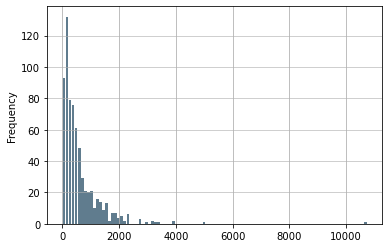

In [13]:
commutes = xu_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [14]:
temp = xu_post[(xu_post['like_count'] <= 4000) & (xu_post['like_count'] > 500)]
temp

,new_date,message,jieba_results,like_count
422,2019-11-14,身為教育立委，將音樂帶入校園是智傑的責任！\n\n音樂教育經常是被忽略的一塊，但智傑一直深知音樂扎根的重要性，積極爭取經費讓鳳山的孩子從小就有接觸藝文活動的機會！\n\n六藝樂集－文化鳳山，音樂飄香－鳳山音樂藝術扎根計畫，從10月開始連續兩個月，巡迴咱鳳山22所國小舉辦校園音樂會，參加過的小朋友都反應熱烈，開啟對音樂的興趣。\n\n「文化鳳山」一直是智傑的宗旨，咱鳳山有曹公、黃埔、衛武營三者精神都很值得鳳山人學習，智傑也推動紙風車到鳳山，讓表演藝術進入到你我的生活當中。除此之外，透過音樂進入校園，提供給鳳山的孩子們能夠在求學的階段，擁有不一樣的美學體驗，打造鳳山成為文化城市。,身為 教育 立委 將音樂帶 入校 園是 智傑 的 責任 音樂 教育 經常 是 被 忽略 的 一塊 但智傑 一直 深 知音 樂 扎根 的 重要性 積極爭 取經費 讓 鳳山 的 孩子 從 小 就 有 接觸 藝文 活動 的 機會 六藝樂集 文化 鳳山 音樂飄香 鳳山 音樂 藝術 扎根 計畫 從 月 開始 連續 兩個 月 巡 迴 咱 鳳山 所 國小 舉辦 校園 音樂會 參加過 的 小朋友 都 反應 熱烈 開啟 對 音樂 的 興趣 文化 鳳山 一直 是 智傑 的 宗旨 咱 鳳山 有 曹公 黃 埔 衛武營 三者 精神 都 很 值得 鳳山 人學習 智傑 也 推動紙 風車 到 鳳山 讓 表演 藝術 進入 到 你 我 的 生活 當中 除此之外 透過 音樂進 入校 園 提供 給 鳳山 的 孩子 們 能夠 在 求學 的 階段 擁有 不 一樣 的 美學 體驗 打造 鳳山 成為 文化 城市,501
423,2019-12-23,再過19天就要投票!讓我們回顧2019年鳳山有哪些不一樣!您知道嗎?\n\n1.藝文 2019.10.10 鳳山之光衛武營啟用一週年吸引380萬人次參觀\n更多資訊 https://ppt.cc/f7ZQ4x\n\n2.停車 2019.10.09 智傑爭取的鳳山車站地下停車場啟用 \n更多資訊 https://ppt.cc/fVd0tx\n\n3.綠地 2019.11.29 智傑爭取43億元原鐵軌之綠園道工程動工\n更多資訊 https://ppt.cc/fsIkfx\n\n4.治水 2019.12.12 智傑向營建署爭取5200萬經費減緩北鳳山淹水\n更多資訊 https://ppt.cc/fq5FLx\n\n5.眷村 2019.11.19 黃埔新村將設置眷村願景館，爭取1.2億元修復東區，繼續爭取西區修復\n更多資訊 https://ppt.cc/foS0Yx\n\n6.親子 2019.09.28 中秋節近萬人參與紙風車公演，未來每年中秋都將舉辦\n更多資訊 https://ppt.cc/f6uCix\n\n7.親水 2019.12.10 智傑爭取水利署1.3億元整治鳳山溪\n更多資訊 https://ppt.cc/fNNwPx\n\n8.體育 2019.12.23 爭取鳳山體育園區經費1.8億元及高雄首座國民運動中心\n更多資訊 https://ppt.cc/fF5EZx\n\n9.音樂 2019.10.01 鳳山音樂藝術扎根計畫，巡迴鳳山22所國小舉辦校園音樂會\n更多資訊 https://ppt.cc/fzXP2x\n\n10.故宮 2019.11.04 故宮首次到鳳山衛武營展覽\n更多資訊 https://ppt.cc/fjfqPx,再過 天 就要 投票 讓 我們 回顧 年 鳳山 有 哪些 不一樣 您 知道 嗎 藝文 鳳山 之光 衛武營 啟用 一週 年 吸引 萬 人次 參觀 更 多 資訊 停車 智傑 爭取 的 鳳山 車站 地下 停車場 啟用 更 多 資訊 綠地 智傑 爭取 億元 原鐵軌 之 綠園 道 工程 動工 更 多 資訊 治水 智傑 向 營建署 爭取 萬經費 減緩北 鳳山 淹水 更 多 資訊 眷村 黃 埔 新村 將設 置 眷村 願景館 爭取 億元修 復 東區 繼續 爭取 西區 修 復 更 多 資訊 親子 中秋 節近 萬人 參與紙 風車 公演 未來 每年 中秋 都 將舉 辦 更 多 資訊 親水 智傑 爭取 水利 署 億元 整治 鳳山 溪 更 多 資訊 體育 爭取 鳳山 體育 園區 經費 億元及 高雄 首座 國民運動 中心 更 多 資訊 音樂 鳳山 音樂 藝術 扎根 計畫 巡 迴 鳳山 所 國小 舉辦 校園 音樂會 更 多 資訊 故宮 故宮 首次 到 鳳山 衛武營 展覽 更 多 資訊,505
424,2019-04-07,分享喜悅～台灣之光！世界球后戴資穎破紀錄，成為羽球史上第一人，蟬聯125週冠軍寶座的紀錄！\n\n#戴資穎 #球后 #破紀錄 #羽球 #體育\n\nhttps://tw.appledaily.com/new/realtime/20190407/1546721/,分享 喜悅 台灣 之光 世界 球后 戴 資穎 破紀錄 成為 羽球 史上 第一 人 蟬聯 週冠 軍寶座 的 紀錄 戴資穎 球后 破紀錄 羽球 體育 /,508
425,2019-11-15,媒體報導骨力的好立委智傑\n\n看到智傑平日一天十多個行程，假日甚至都是20個起跳，媒體報導真的非常拚，智傑有別於傳統的選戰模式，加強跟親子互動，舉行各種親子活動；同是針對長期推廣的鳳山美食票選，繼續透過網路行銷推廣，讓更多人更認識鳳山。\n\n採訪當天13個行程，從一早送車、到晚上喜宴，通通親自到場，以最誠懇實在的方式，爭取鳳山人的信賴！\n\n#小編看到委員跑行程汗流浹背真的很感動 #東森新聞 #誠懇實在 #值得信賴 #許智傑 #鳳山 #美食,媒體 報導 骨力 的 好 立委 智傑 看到 智傑 平日 一天 十多 個 行程 假日 甚至 都 是 個 起跳 媒體 報導 真的 非常 拚 智傑 有別 於 傳統 的 選戰 模式 加強 跟 親子 互動 舉行 各種 親子 活動 同是 針對 長期 推廣 的 鳳山 美食 票選 繼續 透過 網路 行銷 推廣 讓 更 多 人 更 認識 鳳山 採訪 當天 個 行程 從 一早 送車 到 晚上 喜宴 通通 親自到場 以 最誠懇 實在 的 方式 爭取 鳳山 人 的 信賴 小編 看到 委員 跑 行程 汗流 浹 背 真的 很 感動 東森新聞 誠懇實 在 值得 信賴 許智傑 鳳山 美食,509
426,2019-06-14,初選落幕了！民進黨該團結一致，迅速整合，我們絕對沒有分裂的本錢，呼籲兩位參選人跟支持者可以團結一致，對抗中國的一國兩制！\n\n寰宇新聞 https://www.youtube.com/watch?v=Qe1q6mVkRJY,初選 落幕 了 民進 黨 該 團結 一致 迅速 整合 我們 絕對 沒有 分裂 的 本 錢 呼籲 兩位 參選人 跟 支持者 可以 團結 一致 對抗 中國 的 一國 兩制 寰宇 新聞,512
...,...,...,...,...
680,2019-12-28,再14天就要投票了！團結支持14號 民主進步黨！讓台灣更有好意思！\n\n選戰倒數最後兩週了！拜託您集中選票，總統支持③蔡英文、延續建設支持③許智傑！政黨票請支持14號民主進步黨，組成一個圓周(率)3.14，讓台灣未來更圓滿！\n\n作伙用③張選票愛鳳山！③張選票顧台灣！\n智傑懇請您轉發、下載分享給親友！一天幫忙拉一票喔！,再 天 就要 投票 了 團結 支持 號 民主進步黨 讓 台灣 更 有 好意思 選戰 倒數 最後兩週 了 拜 託 您 集中 選票 總統 支持 ③ 蔡英文 延續 建設 支持 ③ 許智傑 政黨票 請 支持 號 民主進步黨 組成 一個 圓周 率 讓 台灣 未來 更 圓滿 作伙 用 ③ 張選票 愛 鳳山 ③ 張選票 顧 台灣 智傑懇 請 您 轉發 下載 分享 給親友 一天 幫忙 拉 一票 喔,3144
681,2019-12-06,最後36天！智傑深深向您一鞠躬，拜託近36萬鳳山鄉親，給智傑繼續服務的機會！\n\n今天下午3:15辣台號在鳳山龍山寺直播\n明天下午4:00小金剛吹泡泡在武松公園\n明天晚上6:00護國保台鳳山開講在赤山廟喔！\n\n#2020台灣要贏 #辣台派,最 後 天 智傑 深深 向 您 一 鞠躬 拜 託 近 萬 鳳山 鄉親 給智傑 繼續 服務 的 機會 今天下午 辣台號 在 鳳山 龍 山寺 直播 明天 下午 小金 剛 吹泡泡 在 武松 公園 明天 晚上 護國 保台 鳳山 開講 在 赤山 廟 喔 台灣 要贏 辣台 派,3259
682,2019-12-18,總統③號蔡英文\n立委③號許智傑\n拜託鳳山的好朋友集中選票投③號！\n\n#3號智傑愛鳳山\n#3張選票顧台灣,總統 ③ 號 蔡英文 立委 ③ 號許 智傑 拜 託 鳳山 的 好 朋友 集中 選票 投 ③ 號 號智傑 愛 鳳山 張選票 顧 台灣,3385
683,2019-09-01,雙J合體，力挺香港\n黃捷議員與智傑再度聯手出擊，一同參加埕市快閃第二回活動，高雄連儂牆留言聲援香港，並趁這次機會造訪附近在地年輕人經營的甜點店，向大家推薦「地方創生」的典範。\n\n活動將一路舉行到下午六點，有空的朋友歡迎到鹽埕區第一市場與我們相見歡（五福四路226號），智傑邀請您一起來連儂牆聲援香港、逛市集、吃美食！\n\n#高雄小金剛 #許智傑 #立委 #黃捷 #埕市集 #鹽埕 #市場 #高雄 #信的店 #埕市快閃 #香港 #連儂牆 #hongkong,雙 合體 力挺 香港 黃 捷議員 與 智傑 再度 聯手 出擊 

In [15]:
corpus = temp['jieba_results'].values.tolist()

In [16]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
X = vectorizer.fit_transform(corpus) #  input must be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X) # X : corpus x word matrix, output:201 x 4835

In [17]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一一,一下,一世,一中,一些,一人拉,一人拉十票,一件,一任,一份,...,鼠兆豐,鼻子,齊全,齊力,齊聚,齊聚智傑,龍井,龍成宮,龍成路,龍獅
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['推薦', '高雄', '美食', '一票', '支持', '立委', '蔡英文', '智傑', '許智傑', '鳳山']
TOP 10 WORDS PER TOPIC #1
['高雄', '建設', '大家', '衛武營', '支持', '一起', '許智傑', '台灣', '智傑', '鳳山']
TOP 10 WORDS PER TOPIC #2
['小金', '資訊', '倒數', '中國', '一起', '大家', '爭取', '台灣', '智傑', '鳳山']
TOP 10 WORDS PER TOPIC #3
['感謝', '立委', '台灣', '朋友', '大家', '許智傑', '衛武營', '高雄', '鳳山', '智傑']
TOP 10 WORDS PER TOPIC #4
['市長', '大家', '衛武營', '韓國瑜', '一起', '許智傑', '高雄', '小金', '智傑', '鳳山']
TOP 10 WORDS PER TOPIC #5
['可以', '美食', '小金', '公里', '進步', '一起', '香港', '高雄', '智傑', '鳳山']
TOP 10 WORDS PER TOPIC #6
['許智傑', '推薦', '台灣', '高雄', '一起', '國小', '美食', '小金', '智傑', '鳳山']
TOP 10 WORDS PER TOPIC #7
['許智傑', '衛武營', '可以', '爭取', '一起', '大家', '公園', '五甲', '智傑', '鳳山']


In [19]:
LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['爭取', '總統', '建設', '立委', '支持', '一票', '智傑', '許智傑', '蔡英文', '鳳山']
TOP 10 WORDS PER TOPIC #1
['影片', '許智傑', '泡泡', '台灣', '一起', '出發', '大家', '美食', '智傑', '鳳山']
TOP 10 WORDS PER TOPIC #2
['加入', '勝利', '小英總統', '小金', '美食', '台灣', '五甲', '直播', '智傑', '鳳山']
TOP 10 WORDS PER TOPIC #3
['智傑', '豆菜', '綠豆湯', '香港', '諸葛', '剛來', '資訊', '小金', '一顆', '鳳山']
TOP 10 WORDS PER TOPIC #4
['大家', '美食', '勞工', '政府', '香港', '投資', '就是', '智傑', '台商', '鳳山']
TOP 10 WORDS PER TOPIC #5
['香港', '報導', '今天', '小金', '紙風車', '幸福', '五甲', '大家', '智傑', '鳳山']
TOP 10 WORDS PER TOPIC #6
['生日', '香港', '貨智傑', '委員', '致詞', '一起', '衛武營', '大家', '美食', '鳳山']
TOP 10 WORDS PER TOPIC #7
['免費', '感謝', '民主', '時間', '智傑', '台灣', '翁立友', '一起', '衛武營', '鳳山']


In [20]:
#政見做斷詞

politics_kuan = politics[politics.姓名 == "管 碧 玲"].政見.to_string()
#politics_kuan = politics[politics.姓名 == "吳思瑤"].政見.to_string()

politics_kuan = re.sub(re_punctuation, "", politics_kuan)
politics_kuan = re.sub(r'[0-9]','',politics_kuan)
politics_kuan = re.sub(r'[a-zA-Z]','',politics_kuan)
politics_kuan = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗、，」「（）]','',politics_kuan)  # 注意裡面不能有空白！
jieba.load_userdict("dict.txt")
politics_words = jieba.lcut(politics_kuan, cut_all = False)

In [21]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_kuan, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗+]','',text)
text = re.sub(re_punctuation, "", text)
text

' 一 扭轉 產業 重北輕南 之 偏失 強化 投資 高雄 增進 高雄 子弟 就業 二 推動 國會 改革 並堅持 台灣 與 中國 簽訂 雙邊協議 之 透明 及國會 監督 三 持續 監督 政府 落實 國際 參與 強化 台灣 之 地位 捍衛 國家 主權 與 尊嚴 四 建立 有效 法律 體系 把 關食材 食品 衛生 安全 維護 人民 食安 基本 權益 五促 進網 路通 訊 環境 保護 網路個 人 資料 隱私 安全 促進 政府 資訊 透明 六 健全 社會住宅 機制 及 幼托 教育系 統使 年輕人 無後顧 之 憂 七反 對 高雄捷運 採 要求 中央 負擔 經費 全面 佈 建 輕軌 捷運 快速道路 健全 高雄 交通 路網 八 衛武營流行音樂中心 時代來 臨強化 在 地 文化 產業 扶植 高雄 藝文 專業 人才 九 持續 推動 文化 資產 保護及 國家 與 地方 鐵道 博物 館 文化 園區 體系 十由 政府 投資 推動 鹽埕 旗津 及 哈瑪星 街廓 再造 繁榮 地方 十一 爭取 落實 旗津 醫院 小時 急診 專案 解決 旗津 港埠 用地 爭議 暫停 所有 訴訟 程序 十二 加強 海洋 觀光 投資 規劃 旗津 第二 聯外 道路 解決 貨櫃車 與 民眾 爭道 問題 十三 充實 鼓山 大樓區 教育 文化 運動 設施 及 幼兒 活動 遊憩 空間 十四 協助 高雄 鐵路地下化 後 城市 廊道 之綠化 與 商業 振興並 堅持 土地 無償 撥用 十五 維護及 扶植 傳統市場 與 傳統 民生 商業 店家 的 生存 發展 十六 強化 母語教育 推動 國家 語言 發展法 建立 國家 語言 資料 庫 公共 場應 提供 母語 服務 十七 推展 高雄 客家 文化 保存 與 生態 產業 群落 創造 客家 子弟 就業機會 十八 檢討 公寓 大廈 管理 條例 由 政府 提供 培訓 計畫 全面 提升 公寓 大廈 管委 會 法治 與 財務 管理 能力'

In [22]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(politics_words)  
p_colword = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=8, random_state=None)

# 政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [p_vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)

TOP 10 WORDS PER TOPIC #0
['爭議', '路通', '捷運', '生存', '教育', '急診', '有效', '管委', '客家', '扶植']
TOP 10 WORDS PER TOPIC #1
['發展法', '生態', '增進', '參與', '貨櫃車', '子弟', '透明', '台灣', '管理', '政府']
TOP 10 WORDS PER TOPIC #2
['尊嚴', '推展', '就業', '博物', '十二', '傳統', '哈瑪星', '公寓', '健全', '高雄']
TOP 10 WORDS PER TOPIC #3
['協助', '無後顧', '群落', '母語', '資料', '監督', '大廈', '安全', '商業', '投資']
TOP 10 WORDS PER TOPIC #4
['遊憩', '中國', '海洋', '檢討', '教育系', '交通', '提供', '體系', '語言', '落實']
TOP 10 WORDS PER TOPIC #5
['培訓', '國際', '活動', '廊道', '十由', '地方', '全面', '建立', '產業', '推動']
TOP 10 WORDS PER TOPIC #6
['資訊', '堅持', '輕軌', '問題', '進網', '公共', '維護及', '強化', '旗津', '文化']
TOP 10 WORDS PER TOPIC #7
['基本', '服務', '用地', '計畫', '無償', '十一', '五促', '持續', '解決', '國家']


In [23]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ')

爭議, 路通, 捷運, 生存, 教育, 急診, 有效, 管委, 客家, 扶植, 發展法, 生態, 增進, 參與, 貨櫃車, 子弟, 透明, 台灣, 管理, 政府, 尊嚴, 推展, 就業, 博物, 十二, 傳統, 哈瑪星, 公寓, 健全, 高雄, 協助, 無後顧, 群落, 母語, 資料, 監督, 大廈, 安全, 商業, 投資, 遊憩, 中國, 海洋, 檢討, 教育系, 交通, 提供, 體系, 語言, 落實, 培訓, 國際, 活動, 廊道, 十由, 地方, 全面, 建立, 產業, 推動, 資訊, 堅持, 輕軌, 問題, 進網, 公共, 維護及, 強化, 旗津, 文化, 基本, 服務, 用地, 計畫, 無償, 十一, 五促, 持續, 解決, 國家, 

In [24]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#智傑 台灣 高雄 鳳山 

Counter({'爭議': 1,
         '路通': 1,
         '捷運': 1,
         '生存': 1,
         '教育': 1,
         '急診': 1,
         '有效': 1,
         '管委': 1,
         '客家': 1,
         '扶植': 1,
         '發展法': 1,
         '生態': 1,
         '增進': 1,
         '參與': 1,
         '貨櫃車': 1,
         '子弟': 1,
         '透明': 1,
         '台灣': 5,
         '管理': 1,
         '政府': 1,
         '尊嚴': 1,
         '推展': 1,
         '就業': 1,
         '博物': 1,
         '十二': 1,
         '傳統': 1,
         '哈瑪星': 1,
         '公寓': 1,
         '健全': 1,
         '高雄': 7,
         '協助': 1,
         '無後顧': 1,
         '群落': 1,
         '母語': 1,
         '資料': 1,
         '監督': 1,
         '大廈': 1,
         '安全': 1,
         '商業': 1,
         '投資': 1,
         '遊憩': 1,
         '中國': 2,
         '海洋': 1,
         '檢討': 1,
         '教育系': 1,
         '交通': 1,
         '提供': 1,
         '體系': 1,
         '語言': 1,
         '落實': 1,
         '培訓': 1,
         '國際': 1,
         '活動': 1,
         '廊道': 1,
         '十由': 1,
     

In [25]:
top_10_message = tfidf_view.sort_values(by = ['台灣'], ascending = False).index[:10] 
# 把台灣tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['台灣'], ascending = False).head(10)

,一一,一下,一世,一中,一些,一人拉,一人拉十票,一件,一任,一份,...,鼠兆豐,鼻子,齊全,齊力,齊聚,齊聚智傑,龍井,龍成宮,龍成路,龍獅
162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.129437,0.0,0.0,0.0,0.0,0.0
258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [27]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[162,]).sort_values(by = 162, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,162
美麗島,0.509643
事件,0.482876
週年,0.482876
台灣,0.403676
民主,0.333124
...,...
寺廟,0.000000
寶里長,0.000000
寶座,0.000000
寶島,0.000000


In [28]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

243    光復高雄
244      饅頭
245      士氣
246      路口
247      老婆
248      信箱
249    光復高雄
250      院長
251      包肉
252      一票
253      水分
254      手中
255      祝福
256      低調
257      爸爸
258      支持
259      明天
260     號智傑
261      連儂
262     翁立友
Name: term, dtype: object

In [29]:
#假如以剛剛科學園區相關主題為例 想看tfidf 最高的詞是兩岸關係的文章
message_newtfidf[message_newtfidf['term']=="中國"]

,一一,一下,一世,一中,一些,一人拉,一人拉十票,一件,一任,一份,...,鼻子,齊全,齊力,齊聚,齊聚智傑,龍井,龍成宮,龍成路,龍獅,term
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,中國


In [30]:
# 會發現文章出現tfidf是產業的很少，很正常 因為出現太多反而tfidf不會高！
temp.iloc[162,]

new_date                       2019-12-07
message               守民主！護台灣！台灣美麗島事件40週年
jieba_results     守 民主 護 台灣 台灣 美麗島 事件  週年
like_count                           1139
Name: 584, dtype: object

In [32]:
words = jieba.lcut(text_list[2], cut_all = False)
print(words)

['～', '從', '風城變', '水城', '，', '論', '去年', '高雄市', '823', '泡水', '之戰', '～', '\n', '\n', '去年', '南', '台灣', '823', '大', '淹水', '，', '許多人', '說', '陳', '菊', '市長', '治水', '無效', '，', '滯洪池', '無效', '，', '導致', '路面', '出現', '5000', '個', '坑洞', '，', '其實', '是', '錯誤', '的', '講法', '，', '我們', '用', '科學來', '論述', '會', '比', '較', '客觀', '。', '\n', '\n', '第一', '、', '高雄市', '防洪', '排水量', '的', '設計', '和', '東京', '差不多', '，', '每小時', '若', '超過', '70', '毫米', '的', '降雨量', '，', '高雄', '和', '東', '京都', '會', '淹水', '。', '台北市', '較', '高', '一些', '，', '但', '每小時', '若', '超過', '80', '毫米', '的', '降雨量', '，', '台北市', '也', '會', '淹水', '。', '像', '去年', '823', '泡戰', '的', '降雨量', '每小時', '超過', '100', '毫米', '，', '所以', '瞬間', '下', '這麼', '大', '的', '豪雨', '，', '即時', '在', '台北市', '也', '承受', '不了', '，', '也', '必定', '會', '淹水', '。', '\n', '\n', '第二', '、', '去年', '823', '泡戰', '的', '總', '降雨量', '和', '2010', '年', '的', '凡納', '比', '颱', '風', '差不多', '，', '當年', '高雄市', '淹', '水面', '積大約', '有', '6000', '公頃', '左右', '，', '而', '同樣', '的', '降雨量', '在', '去年', '的', '淹', '水面', '積', '不到', '當年'

In [33]:
# LDA : 看每篇文章被分配在哪些主題  (tfidf)
#review topic 結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['爭取', '總統', '建設', '立委', '支持', '一票', '智傑', '許智傑', '蔡英文', '鳳山']
TOP 10 WORDS PER TOPIC #1
['影片', '許智傑', '泡泡', '台灣', '一起', '出發', '大家', '美食', '智傑', '鳳山']
TOP 10 WORDS PER TOPIC #2
['加入', '勝利', '小英總統', '小金', '美食', '台灣', '五甲', '直播', '智傑', '鳳山']
TOP 10 WORDS PER TOPIC #3
['智傑', '豆菜', '綠豆湯', '香港', '諸葛', '剛來', '資訊', '小金', '一顆', '鳳山']
TOP 10 WORDS PER TOPIC #4
['大家', '美食', '勞工', '政府', '香港', '投資', '就是', '智傑', '台商', '鳳山']
TOP 10 WORDS PER TOPIC #5
['香港', '報導', '今天', '小金', '紙風車', '幸福', '五甲', '大家', '智傑', '鳳山']
TOP 10 WORDS PER TOPIC #6
['生日', '香港', '貨智傑', '委員', '致詞', '一起', '衛武營', '大家', '美食', '鳳山']
TOP 10 WORDS PER TOPIC #7
['免費', '感謝', '民主', '時間', '智傑', '台灣', '翁立友', '一起', '衛武營', '鳳山']


In [34]:
#可以猜猜看第一篇文是哪個topic 
temp.iloc[:,[0,2]]

,new_date,jieba_results
422,2019-11-14,身為 教育 立委 將音樂帶 入校 園是 智傑 的 責任 音樂 教育 經常 是 被 忽略 的 一塊 但智傑 一直 深 知音 樂 扎根 的 重要性 積極爭 取經費 讓 鳳山 的 孩子 從 小 就 有 接觸 藝文 活動 的 機會 六藝樂集 文化 鳳山 音樂飄香 鳳山 音樂 藝術 扎根 計畫 從 月 開始 連續 兩個 月 巡 迴 咱 鳳山 所 國小 舉辦 校園 音樂會 參加過 的 小朋友 都 反應 熱烈 開啟 對 音樂 的 興趣 文化 鳳山 一直 是 智傑 的 宗旨 咱 鳳山 有 曹公 黃 埔 衛武營 三者 精神 都 很 值得 鳳山 人學習 智傑 也 推動紙 風車 到 鳳山 讓 表演 藝術 進入 到 你 我 的 生活 當中 除此之外 透過 音樂進 入校 園 提供 給 鳳山 的 孩子 們 能夠 在 求學 的 階段 擁有 不 一樣 的 美學 體驗 打造 鳳山 成為 文化 城市
423,2019-12-23,再過 天 就要 投票 讓 我們 回顧 年 鳳山 有 哪些 不一樣 您 知道 嗎 藝文 鳳山 之光 衛武營 啟用 一週 年 吸引 萬 人次 參觀 更 多 資訊 停車 智傑 爭取 的 鳳山 車站 地下 停車場 啟用 更 多 資訊 綠地 智傑 爭取 億元 原鐵軌 之 綠園 道 工程 動工 更 多 資訊 治水 智傑 向 營建署 爭取 萬經費 減緩北 鳳山 淹水 更 多 資訊 眷村 黃 埔 新村 將設 置 眷村 願景館 爭取 億元修 復 東區 繼續 爭取 西區 修 復 更 多 資訊 親子 中秋 節近 萬人 參與紙 風車 公演 未來 每年 中秋 都 將舉 辦 更 多 資訊 親水 智傑 爭取 水利 署 億元 整治 鳳山 溪 更 多 資訊 體育 爭取 鳳山 體育 園區 經費 億元及 高雄 首座 國民運動 中心 更 多 資訊 音樂 鳳山 音樂 藝術 扎根 計畫 巡 迴 鳳山 所 國小 舉辦 校園 音樂會 更 多 資訊 故宮 故宮 首次 到 鳳山 衛武營 展覽 更 多 資訊
424,2019-04-07,分享 喜悅 台灣 之光 世界 球后 戴 資穎 破紀錄 成為 羽球 史上 第一 人 蟬聯 週冠 軍寶座 的 紀錄 戴資穎 球后 破紀錄 羽球 體育 /
425,2019-11-15,媒體 報導 骨力 的 好 立委 智傑 看到 智傑 平日 一天 十多 個 行程 假日 甚至 都 是 個 起跳 媒體 報導 真的 非常 拚 智傑 有別 於 傳統 的 選戰 模式 加強 跟 親子 互動 舉行 各種 親子 活動 同是 針對 長期 推廣 的 鳳山 美食 票選 繼續 透過 網路 行銷 推廣 讓 更 多 人 更 認識 鳳山 採訪 當天 個 行程 從 一早 送車 到 晚上 喜宴 通通 親自到場 以 最誠懇 實在 的 方式 爭取 鳳山 人 的 信賴 小編 看到 委員 跑 行程 汗流 浹 背 真的 很 感動 東森新聞 誠懇實 在 值得 信賴 許智傑 鳳山 美食
426,2019-06-14,初選 落幕 了 民進 黨 該 團結 一致 迅速 整合 我們 絕對 沒有 分裂 的 本 錢 呼籲 兩位 參選人 跟 支持者 可以 團結 一致 對抗 中國 的 一國 兩制 寰宇 新聞
...,...,...
680,2019-12-28,再 天 就要 投票 了 團結 支持 號 民主進步黨 讓 台灣 更 有 好意思 選戰 倒數 最後兩週 了 拜 託 您 集中 選票 總統 支持 ③ 蔡英文 延續 建設 支持 ③ 許智傑 政黨票 請 支持 號 民主進步黨 組成 一個 圓周 率 讓 台灣 未來 更 圓滿 作伙 用 ③ 張選票 愛 鳳山 ③ 張選票 顧 台灣 智傑懇 請 您 轉發 下載 分享 給親友 一天 幫忙 拉 一票 喔
681,2019-12-06,最 後 天 智傑 深深 向 您 一 鞠躬 拜 託 近 萬 鳳山 鄉親 給智傑 繼續 服務 的 機會 今天下午 辣台號 在 鳳山 龍 山寺 直播 明天 下午 小金 剛 吹泡泡 在 武松 公園 明天 晚上 護國 保台 鳳山 開講 在 赤山 廟 喔 台灣 要贏 辣台 派
682,2019-12-18,總統 ③ 號 蔡英文 立委 ③ 號許 智傑 拜 託 鳳山 的 好 朋友 集中 選票 投 ③ 號 號智傑 愛 鳳山 張選票 顧 台灣
683,2019-09-01,雙 合體 力挺 香港 黃 捷議員 與 智傑 再度 聯手 出擊 一同 參加 埕 市 快 閃 第二回 活動 高雄 連儂 牆 留言 聲援 香港 並趁 這次 機會 造訪 附近 在 地 年輕人 經營 的 甜點 店 向 大家 推薦 地方 創生 的 典範 活動將 一路 舉行 到 下午 六點 有空 的 朋友 歡迎 到 鹽埕 區 第一 市場 與 我們 相見歡 五福 四路 號 智傑 邀請 您 一起 來 連儂 牆 聲援 香港 逛 市集 吃 美食 高雄 小金 剛 許智傑 立委 黃 捷 埕 市集 鹽埕 市場 高雄 信 的 店 埕 市 快 閃 香港 連儂 牆


In [35]:
#LDA classification 
temp["topic"]=""#add new column 

doc_topic = LDA.transform(tfidf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()

    temp.iloc[n,4] = topic_most_pr
temp

<ipython-input-35-3dbfd841bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["topic"]=""#add new column
C:\Users\yangs\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,new_date,message,jieba_results,like_count,topic
422,2019-11-14,身為教育立委，將音樂帶入校園是智傑的責任！\n\n音樂教育經常是被忽略的一塊，但智傑一直深知音樂扎根的重要性，積極爭取經費讓鳳山的孩子從小就有接觸藝文活動的機會！\n\n六藝樂集－文化鳳山，音樂飄香－鳳山音樂藝術扎根計畫，從10月開始連續兩個月，巡迴咱鳳山22所國小舉辦校園音樂會，參加過的小朋友都反應熱烈，開啟對音樂的興趣。\n\n「文化鳳山」一直是智傑的宗旨，咱鳳山有曹公、黃埔、衛武營三者精神都很值得鳳山人學習，智傑也推動紙風車到鳳山，讓表演藝術進入到你我的生活當中。除此之外，透過音樂進入校園，提供給鳳山的孩子們能夠在求學的階段，擁有不一樣的美學體驗，打造鳳山成為文化城市。,身為 教育 立委 將音樂帶 入校 園是 智傑 的 責任 音樂 教育 經常 是 被 忽略 的 一塊 但智傑 一直 深 知音 樂 扎根 的 重要性 積極爭 取經費 讓 鳳山 的 孩子 從 小 就 有 接觸 藝文 活動 的 機會 六藝樂集 文化 鳳山 音樂飄香 鳳山 音樂 藝術 扎根 計畫 從 月 開始 連續 兩個 月 巡 迴 咱 鳳山 所 國小 舉辦 校園 音樂會 參加過 的 小朋友 都 反應 熱烈 開啟 對 音樂 的 興趣 文化 鳳山 一直 是 智傑 的 宗旨 咱 鳳山 有 曹公 黃 埔 衛武營 三者 精神 都 很 值得 鳳山 人學習 智傑 也 推動紙 風車 到 鳳山 讓 表演 藝術 進入 到 你 我 的 生活 當中 除此之外 透過 音樂進 入校 園 提供 給 鳳山 的 孩子 們 能夠 在 求學 的 階段 擁有 不 一樣 的 美學 體驗 打造 鳳山 成為 文化 城市,501,7
423,2019-12-23,再過19天就要投票!讓我們回顧2019年鳳山有哪些不一樣!您知道嗎?\n\n1.藝文 2019.10.10 鳳山之光衛武營啟用一週年吸引380萬人次參觀\n更多資訊 https://ppt.cc/f7ZQ4x\n\n2.停車 2019.10.09 智傑爭取的鳳山車站地下停車場啟用 \n更多資訊 https://ppt.cc/fVd0tx\n\n3.綠地 2019.11.29 智傑爭取43億元原鐵軌之綠園道工程動工\n更多資訊 https://ppt.cc/fsIkfx\n\n4.治水 2019.12.12 智傑向營建署爭取5200萬經費減緩北鳳山淹水\n更多資訊 https://ppt.cc/fq5FLx\n\n5.眷村 2019.11.19 黃埔新村將設置眷村願景館，爭取1.2億元修復東區，繼續爭取西區修復\n更多資訊 https://ppt.cc/foS0Yx\n\n6.親子 2019.09.28 中秋節近萬人參與紙風車公演，未來每年中秋都將舉辦\n更多資訊 https://ppt.cc/f6uCix\n\n7.親水 2019.12.10 智傑爭取水利署1.3億元整治鳳山溪\n更多資訊 https://ppt.cc/fNNwPx\n\n8.體育 2019.12.23 爭取鳳山體育園區經費1.8億元及高雄首座國民運動中心\n更多資訊 https://ppt.cc/fF5EZx\n\n9.音樂 2019.10.01 鳳山音樂藝術扎根計畫，巡迴鳳山22所國小舉辦校園音樂會\n更多資訊 https://ppt.cc/fzXP2x\n\n10.故宮 2019.11.04 故宮首次到鳳山衛武營展覽\n更多資訊 https://ppt.cc/fjfqPx,再過 天 就要 投票 讓 我們 回顧 年 鳳山 有 哪些 不一樣 您 知道 嗎 藝文 鳳山 之光 衛武營 啟用 一週 年 吸引 萬 人次 參觀 更 多 資訊 停車 智傑 爭取 的 鳳山 車站 地下 停車場 啟用 更 多 資訊 綠地 智傑 爭取 億元 原鐵軌 之 綠園 道 工程 動工 更 多 資訊 治水 智傑 向 營建署 爭取 萬經費 減緩北 鳳山 淹水 更 多 資訊 眷村 黃 埔 新村 將設 置 眷村 願景館 爭取 億元修 復 東區 繼續 爭取 西區 修 復 更 多 資訊 親子 中秋 節近 萬人 參與紙 風車 公演 未來 每年 中秋 都 將舉 辦 更 多 資訊 親水 智傑 爭取 水利 署 億元 整治 鳳山 溪 更 多 資訊 體育 爭取 鳳山 體育 園區 經費 億元及 高雄 首座 國民運動 中心 更 多 資訊 音樂 鳳山 音樂 藝術 扎根 計畫 巡 迴 鳳山 所 國小 舉辦 校園 音樂會 更 多 資訊 故宮 故宮 首次 到 鳳山 衛武營 展覽 更 多 資訊,505,3
424,2019-04-07,分享喜悅～台灣之光！世界球后戴資穎破紀錄，成為羽球史上第一人，蟬聯125週冠軍寶座的紀錄！\n\n#戴資穎 #球后 #破紀錄 #羽球 #體育\n\nhttps://tw.appledaily.com/new/realtime/20190407/1546721/,分享 喜悅 台灣 之光 世界 球后 戴 資穎 破紀錄 成為 羽球 史上 第一 人 蟬聯 週冠 軍寶座 的 紀錄 戴資穎 球后 破紀錄 羽球 體育 /,508,3
425,2019-11-15,媒體報導骨力的好立委智傑\n\n看到智傑平日一天十多個行程，假日甚至都是20個起跳，媒體報導真的非常拚，智傑有別於傳統的選戰模式，加強跟親子互動，舉行各種親子活動；同是針對長期推廣的鳳山美食票選，繼續透過網路行銷推廣，讓更多人更認識鳳山。\n\n採訪當天13個行程，從一早送車、到晚上喜宴，通通親自到場，以最誠懇實在的方式，爭取鳳山人的信賴！\n\n#小編看到委員跑行程汗流浹背真的很感動 #東森新聞 #誠懇實在 #值得信賴 #許智傑 #鳳山 #美食,媒體 報導 骨力 的 好 立委 智傑 看到 智傑 平日 一天 十多 個 行程 假日 甚至 都 是 個 起跳 媒體 報導 真的 非常 拚 智傑 有別 於 傳統 的 選戰 模式 加強 跟 親子 互動 舉行 各種 親子 活動 同是 針對 長期 推廣 的 鳳山 美食 票選 繼續 透過 網路 行銷 推廣 讓 更 多 人 更 認識 鳳山 採訪 當天 個 行程 從 一早 送車 到 晚上 喜宴 通通 親自到場 以 最誠懇 實在 的 方式 爭取 鳳山 人 的 信賴 小編 看到 委員 跑 行程 汗流 浹 背 真的 很 感動 東森新聞 誠懇實 在 值得 信賴 許智傑 鳳山 美食,509,5
426,2019-06-14,初選落幕了！民進黨該團結一致，迅速整合，我們絕對沒有分裂的本錢，呼籲兩位參選人跟支持者可以團結一致，對抗中國的一國兩制！\n\n寰宇新聞 https://www.youtube.com/watch?v=Qe1q6mVkRJY,初選 落幕 了 民進 黨 該 團結 一致 迅速 整合 我們 絕對 沒有 分裂 的 本 錢 呼籲 兩位 參選人 跟 支持者 可以 團結 一致 對抗 中國 的 一國 兩制 寰宇 新聞,512,1
...,...,...,...,...,...
680,2019-12-28,再14天就要投票了！團結支持14號 民主進步黨！讓台灣更有好意思！\n\n選戰倒數最後兩週了！拜託您集中選票，總統支持③蔡英文、延續建設支持③許智傑！政黨票請支持14號民主進步黨，組成一個圓周(率)3.14，讓台灣未來更圓滿！\n\n作伙用③張選票愛鳳山！③張選票顧台灣！\n智傑懇請您轉發、下載分享給親友！一天幫忙拉一票喔！,再 天 就要 投票 了 團結 支持 號 民主進步黨 讓 台灣 更 有 好意思 選戰 倒數 最後兩週 了 拜 託 您 集中 選票 總統 支持 ③ 蔡英文 延續 建設 支持 ③ 許智傑 政黨票 請 支持 號 民主進步黨 組成 一個 圓周 率 讓 台灣 未來 更 圓滿 作伙 用 ③ 張選票 愛 鳳山 ③ 張選票 顧 台灣 智傑懇 請 您 轉發 下載 分享 給親友 一天 幫忙 拉 一票 喔,3144,0
681,2019-12-06,最後36天！智傑深深向您一鞠躬，拜託近36萬鳳山鄉親，給智傑繼續服務的機會！\n\n今天下午3:15辣台號在鳳山龍山寺直播\n明天下午4:00小金剛吹泡泡在武松公園\n明天晚上6:00護國保台鳳山開講在赤山廟喔！\n\n#2020台灣要贏 #辣台派,最 後 天 智傑 深深 向 您 一 鞠躬 拜 託 近 萬 鳳山 鄉親 給智傑 繼續 服務 的 機會 今天下午 辣台號 在 鳳山 龍 山寺 直播 明天 下午 小金 剛 吹泡泡 在 武松 公園 明天 晚上 護國 保台 鳳山 開講 在 赤山 廟 喔 台灣 要贏 辣台 派,3259,2
682,2019-12-18,總統③號蔡英文\n立委③號許智傑\n拜託鳳山的好朋友集中選票投③號！\n\n#3號智傑愛鳳山\n#3張選票顧台灣,總統 ③ 號 蔡英文 立委 ③ 號許 智傑 拜 託 鳳山 的 好 朋友 集中 選票 投 ③ 號 號智傑 愛 鳳山 張選票 顧 台灣,3385,0
683,2019-09-01,雙J合體，力挺香港\n黃捷議員與智傑再度聯手出擊，一同參加埕市快閃第二回活動，高雄連儂牆留言聲援香港，並趁這次機會造訪附近在地年輕人經營的甜點店，向大家推薦「地方創生」的典範。\n\n活動將一路舉行到下午六點，有空的朋友歡迎到鹽埕區第一市場與我們相見歡（五福四路226號），智傑邀請您一起來連儂牆聲援香港、逛市集、吃美食！\n\n#高雄小金剛 #許智傑 #立委 #黃捷 #埕市集 #鹽埕 #市場 #高雄 #信的店 #埕市快閃 #香港 #連儂牆 #hongkong,雙 合體 

In [36]:
Counter(temp.iloc[-20:, 4])
#這邊可以看到在讚數top20 多的那些文章中 哪些主題比較熱門
#Topic 這些主題相關比較熱門

Counter({1: 1, 7: 3, 3: 2, 0: 7, 2: 3, 5: 1, 6: 1, 4: 2})

In [37]:
#politics_word
match_column = list(set(politics_words).intersection(vectorizer.get_feature_names()))
match_column

['年輕人',
 '服務',
 '安全',
 '產業',
 '台灣',
 '運動',
 '廊道',
 '經費',
 '資訊',
 '交通',
 '園區',
 '參與',
 '爭取',
 '客家',
 '國會',
 '堅持',
 '鹽埕',
 '人才',
 '旗津',
 '十二',
 '資產',
 '協助',
 '民眾',
 '商業',
 '捍衛',
 '中央',
 '國際',
 '培訓',
 '生態',
 '保存',
 '國家',
 '高雄',
 '要求',
 '藝文',
 '投資',
 '鐵路地下化',
 '語言',
 '資料',
 '規劃',
 '發展',
 '保護',
 '中國',
 '十一',
 '鼓山',
 '鐵道',
 '環境',
 '捷運',
 '公共',
 '民生',
 '提供',
 '傳統',
 '法律',
 '維護',
 '簽訂',
 '解決',
 '檢討',
 '第二',
 '母語',
 '博物',
 '文化',
 '路通',
 '落實',
 '城市',
 '食安',
 '充實',
 '觀光',
 '活動',
 '持續',
 '子弟',
 '條例',
 '店家',
 '發展法',
 '人民',
 '道路',
 '權益',
 '主權',
 '問題',
 '加強',
 '幼兒',
 '法治',
 '設施',
 '空間',
 '創造',
 '專業',
 '繁榮',
 '管理',
 '改革',
 '負擔',
 '計畫',
 '小時',
 '教育',
 '母語教育',
 '政府',
 '監督',
 '所有',
 '高雄捷運',
 '地方',
 '土地',
 '海洋',
 '推動']

In [38]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,一一,一下,一世,一中,一些,一人拉,一人拉十票,一件,一任,一份,...,鼠兆豐,鼻子,齊全,齊力,齊聚,齊聚智傑,龍井,龍成宮,龍成路,龍獅
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#確認term matrix是對的  檢查第200篇貼文真的有”一個“這個詞 
temp.iloc[200,]

new_date                                                                                                                                                                                                                                                                                                                                                                                2019-08-10
message                                                         五甲廟今晚超熱鬧！大家輪流助講團結支持 #3Q #陳柏惟 #臺灣團結 #捍衛民主\n\n陳柏惟高人氣號召民進黨、時代力量、基進黨等政黨，在同一個舞台共同護台抗中。智傑很榮幸能以在地鳳山立委身份，在台上呼籲台派政黨，不論民進黨、基進黨、時代力量、社民黨、台聯等，都要團結合作組成護台灣聯盟！\n\n也希望大家團結支持 蔡英文 Tsai Ing-wen總統連任、台上所有立委候選人 @陳柏惟、 @劉世芳、  管碧玲 (kuanbiling)、趙天麟、登真-邱議瑩、@李昆澤、 @賴瑞隆、以及我 @許智傑，通通可以當選，在立法院守護台灣！\n\n呼籲大家 #護台灣 #反一國兩制 #反九二共識 #挺香港 #反送中，將台灣好青年柏惟送進臺中，進軍國會。
jieba_results     五甲 廟 今晚 超熱鬧 大家 輪流助 講團結 支持    陳 柏惟  臺 灣團結  捍衛 民主 陳 柏惟高人 氣號 召民進 黨 時代 力量 基進 黨 等 政黨 在 同一 個 舞台 共同 護台 抗中  智傑 很榮 幸能 以 在 地 鳳山 立委 身份 在 台上 呼籲 台派 政黨 不論民 進黨 基進 黨 時代 力量 社民黨 台聯 等 都 要 團結 合作 組成護 台灣 聯盟 也 希望 大家 團結 支持 蔡英文     總

In [40]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,年輕人,服務,安全,產業,台灣,運動,廊道,經費,資訊,交通,...,教育,母語教育,政府,監督,所有,高雄捷運,地方,土地,海洋,推動
0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,10,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [42]:
temp.iloc[258,]

new_date                                                                                                                                                                                                     2019-12-28
message                                             再14天就要投票了！團結支持14號 民主進步黨！讓台灣更有好意思！\n\n選戰倒數最後兩週了！拜託您集中選票，總統支持③蔡英文、延續建設支持③許智傑！政黨票請支持14號民主進步黨，組成一個圓周(率)3.14，讓台灣未來更圓滿！\n\n作伙用③張選票愛鳳山！③張選票顧台灣！\n智傑懇請您轉發、下載分享給親友！一天幫忙拉一票喔！
jieba_results     再  天 就要 投票 了 團結 支持  號 民主進步黨 讓 台灣 更 有 好意思 選戰 倒數 最後兩週 了 拜 託 您 集中 選票 總統 支持 ③ 蔡英文 延續 建設 支持 ③ 許智傑 政黨票 請 支持  號 民主進步黨 組成 一個 圓周 率  讓 台灣 未來 更 圓滿 作伙 用 ③ 張選票 愛 鳳山 ③ 張選票 顧 台灣 智傑懇 請 您 轉發 下載 分享 給親友 一天 幫忙 拉 一票 喔 
like_count                                                                                                                                                                                                         3144
topic                                                                                                                                   

In [43]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)
match_document_politics

<ipython-input-43-1ded51f200cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics["sum"] = match_document_politics.sum(axis=1)


,年輕人,服務,安全,產業,台灣,運動,廊道,經費,資訊,交通,...,母語教育,政府,監督,所有,高雄捷運,地方,土地,海洋,推動,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
1,0,0,0,0,0,0,0,1,10,0,...,0,0,0,0,0,0,0,0,0,22
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
259,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
260,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
261,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,8


In [44]:
sum(match_document_politics['sum'].tolist()) / len(match_column) #平均一個詞 200篇中會有17篇有包含政策相關的

11.19

In [45]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) 
# 相關度

0.042547528517110265